In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [16]:
df = pd.read_csv('data.txt',sep=',',header=0)
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


# Removing Row.names

In [17]:
df1 = df.drop('row.names',axis=1)
df1

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


# Attribute Statistics

In [19]:
df1.describe(include='all')  

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462,462.000000,462.000000,462.000000,462.000000,462.000000
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Absent,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,270,NaN,NaN,NaN,NaN,NaN
mean,138.326840,3.635649,4.740325,25.406732,NaN,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,NaN,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,NaN,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,NaN,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,NaN,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,NaN,60.000000,28.497500,23.892500,55.000000,1.000000


# Checking for Missing Values

In [27]:
for i in range(10):
    print(df1.iloc[:,[i]].isnull().values.any())
#No Missing Values

False
False
False
False
False
False
False
False
False
False


# Columns

In [29]:
numeric_cols = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age','chd']
sting_cols = ['famhist']

# Data Visualization

## Checking for Outliers

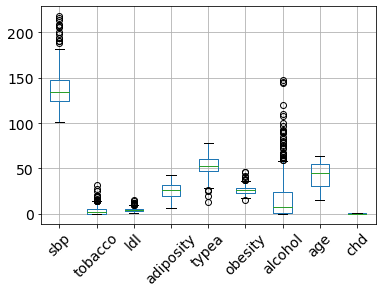

In [33]:
df1.boxplot(column=numeric_cols, rot=45,fontsize='14')

## Outliers values present in sbp,tobacco,ldl,typea,obesity,alcohol

In [48]:
Q1 = df1['sbp'].quantile(0.25)
Q3 = df1['sbp'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['sbp'] >= Q1 - 1.5 * IQR) & (df1['sbp'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
df1.loc[filter==False,['sbp']]

,sbp
10,206
94,194
161,208
170,194
219,208
229,188
242,190
282,206
314,190
345,198


In [49]:
Q1 = df1['tobacco'].quantile(0.25)
Q3 = df1['tobacco'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['tobacco'] >= Q1 - 1.5 * IQR) & (df1['tobacco'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
df1.loc[filter==False,['tobacco']]

,tobacco
11,14.10
19,14.00
24,18.20
114,31.20
140,14.00
149,15.50
161,27.40
179,15.00
186,20.00
235,18.00


In [50]:
Q1 = df1['ldl'].quantile(0.25)
Q3 = df1['ldl'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['ldl'] >= Q1 - 1.5 * IQR) & (df1['ldl'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
df1.loc[filter==False,['ldl']]

,ldl
16,15.33
25,12.42
26,9.65
98,11.32
115,10.58
125,11.17
243,10.53
345,11.89
382,11.41
387,10.49


In [52]:
Q1 = df1['typea'].quantile(0.25)
Q3 = df1['typea'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['typea'] >= Q1 - 1.5 * IQR) & (df1['typea'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
df1.loc[filter==False,['typea']]

,typea
117,13
218,26
336,20
375,25


In [53]:
Q1 = df1['obesity'].quantile(0.25)
Q3 = df1['obesity'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['obesity'] >= Q1 - 1.5 * IQR) & (df1['obesity'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
df1.loc[filter==False,['obesity']]

,obesity
26,38.80
44,46.58
81,45.72
107,37.41
181,40.34
221,41.76
271,37.24
313,37.71
461,14.70


In [54]:
Q1 = df1['alcohol'].quantile(0.25)
Q3 = df1['alcohol'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['alcohol'] >= Q1 - 1.5 * IQR) & (df1['alcohol'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
df1.loc[filter==False,['alcohol']]

,alcohol
0,97.20
53,66.65
55,100.32
65,61.71
79,72.00
105,108.00
131,79.82
154,147.19
155,120.03
157,59.79
